## Disusun oleh :
### 13515012 - Rio Dwi Putra Perkasa
### 13515042 - Edwin Rachman
### 13515132 - Prama Legawa Halqavi
### 13515135 - Muhammad Akmal Pratama
### 13515147 - Zacki Zulfikar Fauzi

In [1]:
#IMPORT FILE CSV
import pandas as pd
from sklearn import preprocessing
attributeName = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation","relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]
#data=pd.read_csv("D:/CencusIncome.data.txt", names=attributeName)

data=pd.read_csv("CencusIncome.data.txt", names=attributeName)
# GANTI PATHNYA ^^^^^^^^^^^^^^^^^^^^^

data["capital-gain"] = data[["capital-gain"]].replace(' ?', data["capital-gain"].mean())
data["capital-loss"] = data[["capital-loss"]].replace(' ?', data["capital-loss"].mean())
data["hours-per-week"] = data[["hours-per-week"]].replace(' ? ', data["hours-per-week"].mean())

data["workclass"] = data[["workclass"]].replace(' ?', " " + data["workclass"].mode()[0])
data["education"] = data[["education"]].replace(' ?', " " + data["education"].mode()[0])
data["marital-status"] = data[["marital-status"]].replace(' ?', " " + data["marital-status"].mode()[0])
data["occupation"] = data[["occupation"]].replace(' ?', " " + data["occupation"].mode()[0])
data["relationship"] = data[["relationship"]].replace(' ?', " " + data["relationship"].mode()[0])
data["race"] = data[["race"]].replace(' ?', " " + data["race"].mode()[0])
data["sex"] = data[["sex"]].replace(' ?', " " + data["sex"].mode()[0])

# DATA ENCODING
#### Sebelum di proses, data harus di encode terlebih agar dapat diproses. Data akan dirubah kedalam representasi integer, data tidak akan bisa diolah. Encoding dilakukan dengan menggunakan method LabelEncoder(). LaberEncoder() akan mengubah setiap data yang unik menjadi representasi integer. Tidak seluruh data akan di encode, data yang continuous tidak di encode.

In [2]:
cidata = data.values

le1 = preprocessing.LabelEncoder()
le1.fit(cidata[:,1])
list(le1.classes_)
cidata[:,1] = le1.transform(cidata[:,1])


le3 = preprocessing.LabelEncoder()
le3.fit(cidata[:,3])
list(le3.classes_)
cidata[:,3] = le3.transform(cidata[:,3])

le5 = preprocessing.LabelEncoder()
le5.fit(cidata[:,5])
list(le5.classes_)
cidata[:,5] = le5.transform(cidata[:,5])

le6 = preprocessing.LabelEncoder()
le6.fit(cidata[:,6])
list(le6.classes_)
cidata[:,6] = le6.transform(cidata[:,6])

le7 = preprocessing.LabelEncoder()
le7.fit(cidata[:,7])
list(le7.classes_)
cidata[:,7] = le7.transform(cidata[:,7])

le8 = preprocessing.LabelEncoder()
le8.fit(cidata[:,8])
list(le8.classes_)
cidata[:,8] = le8.transform(cidata[:,8])

le9 = preprocessing.LabelEncoder()
le9.fit(cidata[:,9])
list(le9.classes_)
cidata[:,9] = le9.transform(cidata[:,9])

le13 = preprocessing.LabelEncoder()
le13.fit(cidata[:,13])
list(le13.classes_)
cidata[:,13] = le13.transform(cidata[:,13])

le14 = preprocessing.LabelEncoder()
le14.fit(cidata[:,14])
list(le14.classes_)
cidata[:,14] = le14.transform(cidata[:,14])
print(cidata)

[[39 7 77516 ... 40 39 0]
 [50 6 83311 ... 13 39 0]
 [38 4 215646 ... 40 39 0]
 ...
 [58 4 151910 ... 40 39 0]
 [22 4 201490 ... 20 39 0]
 [52 5 287927 ... 40 39 1]]


In [3]:
import numpy as np
index = [str(i) for i in range(0, len(cidata))]
data2 = pd.DataFrame(data=np.int_(cidata[:,:]), columns=attributeName, index=index)

target = data2.loc[:,"salary"]
data = data2.loc[:,"age":"native-country"]
data = data.drop('education-num', axis=1)
data = data.drop('fnlwgt', axis=1)
data = data.drop('native-country', axis=1)
data = data.drop('age', axis=1)

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Hasil analisis data dilakukan dengan cara menentukan performa dari setiap algoritma pembelajaran, performanya diukur dari seberapa sedikit kesalahan yang muncul dari data prediksi dibandingkan dengan data tes dari hasil pembelajaran. Untuk setiap fold menghasilkan persentase akurasi seberapa banyak prediksi yang tepat, sehingga untuk mendapatkan akurasi total kita mendapatkannya dengan cara mencari rata-rata akurasi dari 10 fold pembelajaran yang dilakukan.

## kNN



kNN 10-fold cross validation
KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 3257  3258  3259 ... 32558 32559 32560] 
TEST : [   0    1    2 ... 3254 3255 3256]
Number of mislabeled points out of a total 3257 points : 512
Accuracy : 0.8428
Confusion matrix, without normalization
[[2311  136]
 [ 376  434]]


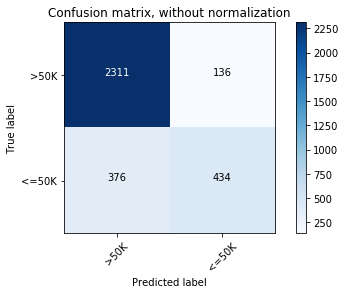

Fold  2
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [3257 3258 3259 ... 6510 6511 6512]
Number of mislabeled points out of a total 3256 points : 497
Accuracy : 0.8474
Confusion matrix, without normalization
[[2358  136]
 [ 361  401]]


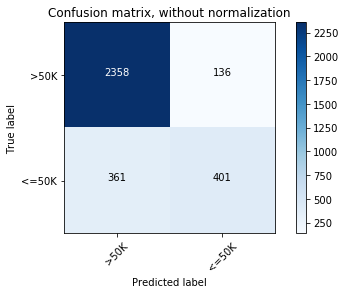

Fold  3
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [6513 6514 6515 ... 9766 9767 9768]
Number of mislabeled points out of a total 3256 points : 452
Accuracy : 0.8612
Confusion matrix, without normalization
[[2386  120]
 [ 332  418]]


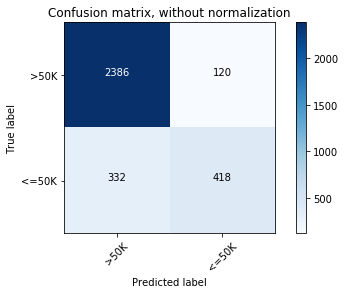

Fold  4
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [ 9769  9770  9771 ... 13022 13023 13024]
Number of mislabeled points out of a total 3256 points : 512
Accuracy : 0.8428
Confusion matrix, without normalization
[[2309  155]
 [ 357  435]]


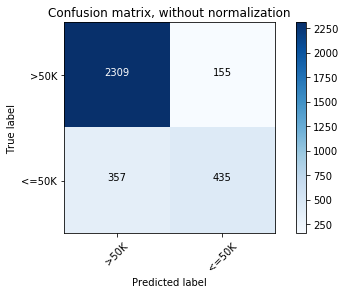

Fold  5
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [13025 13026 13027 ... 16278 16279 16280]
Number of mislabeled points out of a total 3256 points : 464
Accuracy : 0.8575
Confusion matrix, without normalization
[[2344  129]
 [ 335  448]]


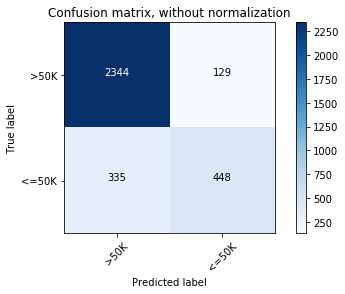

Fold  6
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [16281 16282 16283 ... 19534 19535 19536]
Number of mislabeled points out of a total 3256 points : 486
Accuracy : 0.8507
Confusion matrix, without normalization
[[2339  151]
 [ 335  431]]


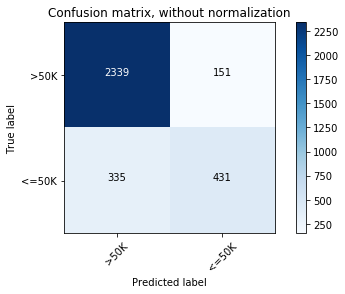

Fold  7
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [19537 19538 19539 ... 22790 22791 22792]
Number of mislabeled points out of a total 3256 points : 478
Accuracy : 0.8532
Confusion matrix, without normalization
[[2360  122]
 [ 356  418]]


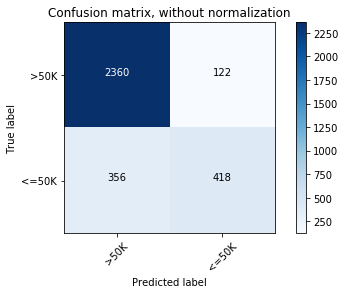

Fold  8
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [22793 22794 22795 ... 26046 26047 26048]
Number of mislabeled points out of a total 3256 points : 445
Accuracy : 0.8633
Confusion matrix, without normalization
[[2346  106]
 [ 339  465]]


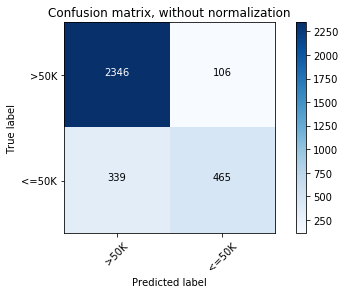

Fold  9
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [26049 26050 26051 ... 29302 29303 29304]
Number of mislabeled points out of a total 3256 points : 493
Accuracy : 0.8486
Confusion matrix, without normalization
[[2332  128]
 [ 365  431]]


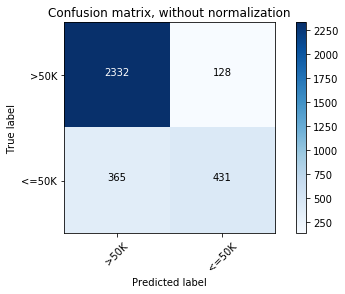

Fold  10
TRAIN : [    0     1     2 ... 29302 29303 29304] 
TEST : [29305 29306 29307 ... 32558 32559 32560]
Number of mislabeled points out of a total 3256 points : 493
Accuracy : 0.8486
Confusion matrix, without normalization
[[2305  147]
 [ 346  458]]


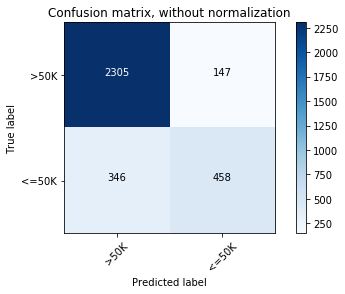

Sum of mislabeled points : 4832
Mean of mislabeled points : 483.2000
Total accuracy : 0.8516


In [5]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
class_names = [">50K", "<=50K"]
print("\n")
print("kNN 10-fold cross validation")
print("=======================")
knn = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree')
kf = KFold(n_splits = 10, shuffle = False)
print(kf)
i = 1
temp = 0
tempacc = 0
for train_index, test_index in kf.split(data):
    print("Fold ", i)
    print("TRAIN :", train_index, "\nTEST :", test_index)
    x_train = data.iloc[train_index]
    x_test = data.iloc[test_index]
    y_train = target.iloc[train_index]
    y_test = target.iloc[test_index]
    i += 1
    y_pred = knn.fit(x_train, y_train).predict(x_test)
    print("Number of mislabeled points out of a total %d points : %d" % (len(x_test), (y_test != y_pred).sum()))
    print("Accuracy : %.4f" % accuracy_score(y_test,y_pred))
    temp += (y_test != y_pred).sum()
    tempacc += accuracy_score(y_test,y_pred)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')
    plt.show()
tempacc = tempacc/10
print("Sum of mislabeled points : %d" % temp)
print("Mean of mislabeled points : %.4f" % float(temp/10))
print("Total accuracy : %.4f" % tempacc)

## Naive Bayes



Naive Bayes 10-fold cross validation
KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 3257  3258  3259 ... 32558 32559 32560] 
TEST : [   0    1    2 ... 3254 3255 3256]
Number of mislabeled points out of a total 3257 points : 684
Accuracy : 0.7900
Confusion matrix, without normalization
[[2319  128]
 [ 556  254]]


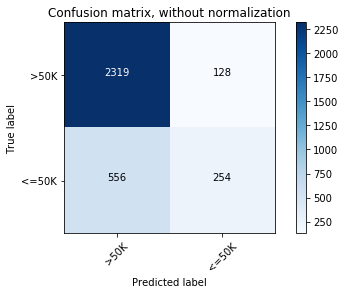

Fold  2
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [3257 3258 3259 ... 6510 6511 6512]
Number of mislabeled points out of a total 3256 points : 649
Accuracy : 0.8007
Confusion matrix, without normalization
[[2371  123]
 [ 526  236]]


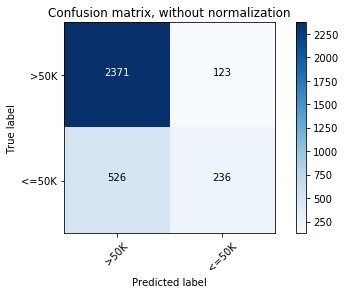

Fold  3
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [6513 6514 6515 ... 9766 9767 9768]
Number of mislabeled points out of a total 3256 points : 655
Accuracy : 0.7988
Confusion matrix, without normalization
[[2367  139]
 [ 516  234]]


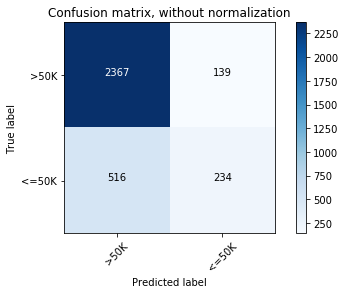

Fold  4
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [ 9769  9770  9771 ... 13022 13023 13024]
Number of mislabeled points out of a total 3256 points : 672
Accuracy : 0.7936
Confusion matrix, without normalization
[[2338  126]
 [ 546  246]]


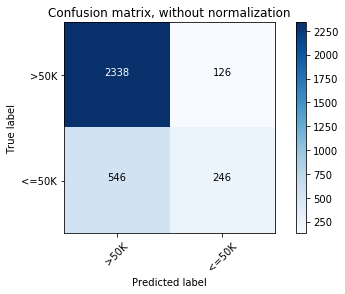

Fold  5
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [13025 13026 13027 ... 16278 16279 16280]
Number of mislabeled points out of a total 3256 points : 662
Accuracy : 0.7967
Confusion matrix, without normalization
[[2361  112]
 [ 550  233]]


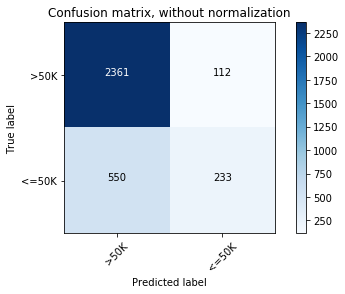

Fold  6
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [16281 16282 16283 ... 19534 19535 19536]
Number of mislabeled points out of a total 3256 points : 629
Accuracy : 0.8068
Confusion matrix, without normalization
[[2378  112]
 [ 517  249]]


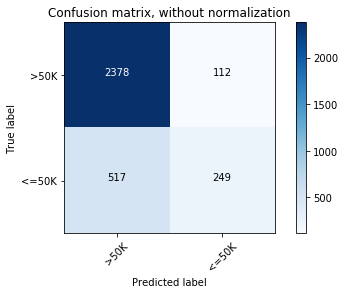

Fold  7
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [19537 19538 19539 ... 22790 22791 22792]
Number of mislabeled points out of a total 3256 points : 693
Accuracy : 0.7872
Confusion matrix, without normalization
[[2347  135]
 [ 558  216]]


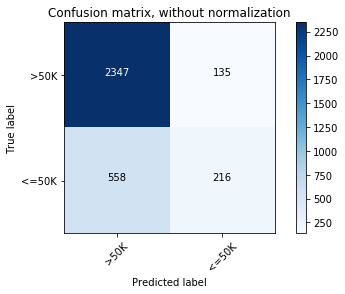

Fold  8
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [22793 22794 22795 ... 26046 26047 26048]
Number of mislabeled points out of a total 3256 points : 668
Accuracy : 0.7948
Confusion matrix, without normalization
[[2327  125]
 [ 543  261]]


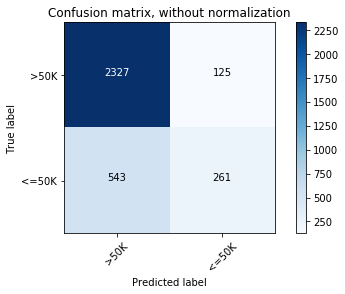

Fold  9
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [26049 26050 26051 ... 29302 29303 29304]
Number of mislabeled points out of a total 3256 points : 676
Accuracy : 0.7924
Confusion matrix, without normalization
[[2346  114]
 [ 562  234]]


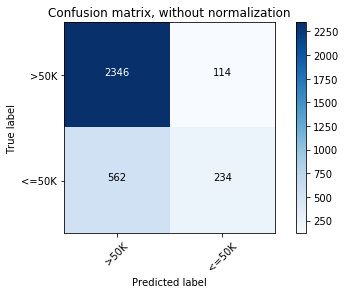

Fold  10
TRAIN : [    0     1     2 ... 29302 29303 29304] 
TEST : [29305 29306 29307 ... 32558 32559 32560]
Number of mislabeled points out of a total 3256 points : 643
Accuracy : 0.8025
Confusion matrix, without normalization
[[2345  107]
 [ 536  268]]


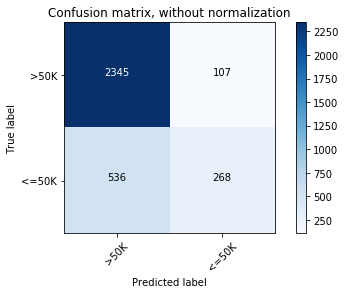

Sum of mislabeled points : 6631
Mean of mislabeled points : 663.1000
Total accuracy : 0.7964


In [6]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
class_names = [">50K", "<=50K"]
print("\n")
print("Naive Bayes 10-fold cross validation")
print("=======================")
nb = GaussianNB()
kf = KFold(n_splits = 10, shuffle = False)
print(kf)
i = 1
temp = 0
tempacc = 0
for train_index, test_index in kf.split(data):
    print("Fold ", i)
    print("TRAIN :", train_index, "\nTEST :", test_index)
    x_train = data.iloc[train_index]
    x_test = data.iloc[test_index]
    y_train = target.iloc[train_index]
    y_test = target.iloc[test_index]
    i += 1
    y_pred = nb.fit(x_train, y_train).predict(x_test)
    print("Number of mislabeled points out of a total %d points : %d" % (len(x_test), (y_test != y_pred).sum()))
    print("Accuracy : %.4f" % accuracy_score(y_test,y_pred))
    temp += (y_test != y_pred).sum()
    tempacc += accuracy_score(y_test,y_pred)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')
    plt.show()
tempacc = tempacc/10
print("Sum of mislabeled points : %d" % temp)
print("Mean of mislabeled points : %.4f" % float(temp/10))
print("Total accuracy : %.4f" % tempacc)

## MLP



MLP 10-fold cross validation
KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 3257  3258  3259 ... 32558 32559 32560] 
TEST : [   0    1    2 ... 3254 3255 3256]
Number of mislabeled points out of a total 3257 points : 632
Accuracy : 0.8060
Confusion matrix, without normalization
[[2337  110]
 [ 522  288]]


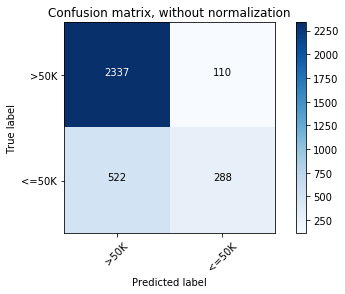

Fold  2
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [3257 3258 3259 ... 6510 6511 6512]
Number of mislabeled points out of a total 3256 points : 617
Accuracy : 0.8105
Confusion matrix, without normalization
[[2351  143]
 [ 474  288]]


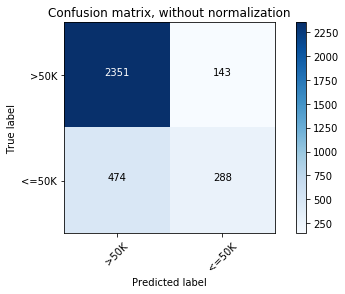

Fold  3
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [6513 6514 6515 ... 9766 9767 9768]
Number of mislabeled points out of a total 3256 points : 645
Accuracy : 0.8019
Confusion matrix, without normalization
[[2452   54]
 [ 591  159]]


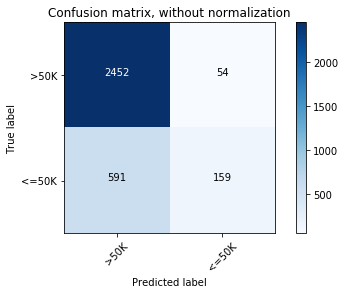

Fold  4
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [ 9769  9770  9771 ... 13022 13023 13024]
Number of mislabeled points out of a total 3256 points : 647
Accuracy : 0.8013
Confusion matrix, without normalization
[[2325  139]
 [ 508  284]]


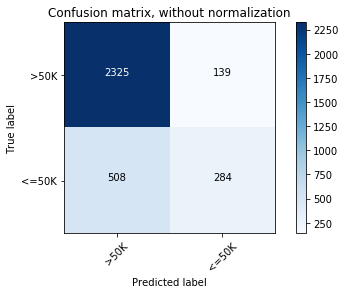

Fold  5
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [13025 13026 13027 ... 16278 16279 16280]
Number of mislabeled points out of a total 3256 points : 697
Accuracy : 0.7859
Confusion matrix, without normalization
[[2263  210]
 [ 487  296]]


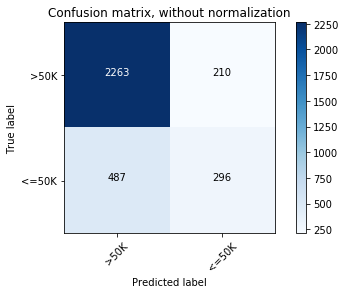

Fold  6
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [16281 16282 16283 ... 19534 19535 19536]
Number of mislabeled points out of a total 3256 points : 677
Accuracy : 0.7921
Confusion matrix, without normalization
[[2057  433]
 [ 244  522]]


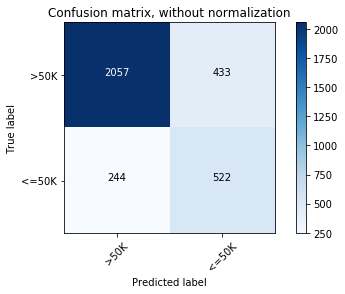

Fold  7
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [19537 19538 19539 ... 22790 22791 22792]
Number of mislabeled points out of a total 3256 points : 591
Accuracy : 0.8185
Confusion matrix, without normalization
[[2299  183]
 [ 408  366]]


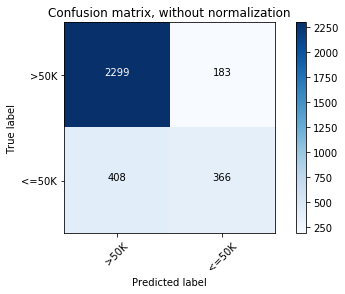

Fold  8
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [22793 22794 22795 ... 26046 26047 26048]
Number of mislabeled points out of a total 3256 points : 666
Accuracy : 0.7955
Confusion matrix, without normalization
[[2280  172]
 [ 494  310]]


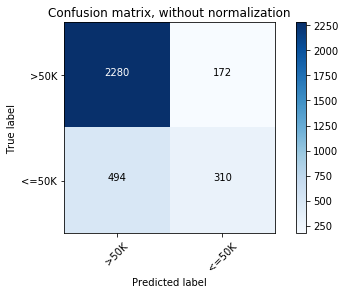

Fold  9
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [26049 26050 26051 ... 29302 29303 29304]
Number of mislabeled points out of a total 3256 points : 660
Accuracy : 0.7973
Confusion matrix, without normalization
[[2317  143]
 [ 517  279]]


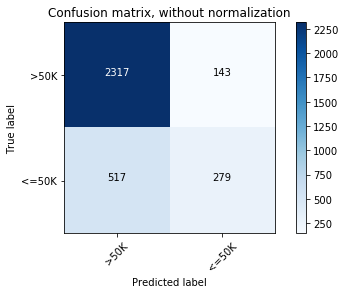

Fold  10
TRAIN : [    0     1     2 ... 29302 29303 29304] 
TEST : [29305 29306 29307 ... 32558 32559 32560]
Number of mislabeled points out of a total 3256 points : 609
Accuracy : 0.8130
Confusion matrix, without normalization
[[2300  152]
 [ 457  347]]


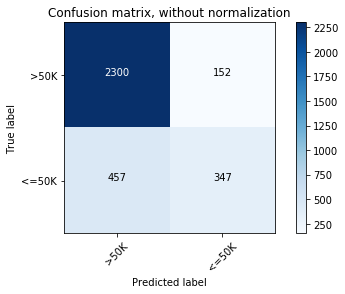

Sum of mislabeled points : 6441
Mean of mislabeled points : 644.1000
Total accuracy : 0.8022


In [7]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
class_names = [">50K", "<=50K"]
print("\n")
print("MLP 10-fold cross validation")
print("=======================")
mlp = MLPClassifier()
kf = KFold(n_splits = 10, shuffle = False)
print(kf)
i = 1
temp = 0
tempacc = 0
for train_index, test_index in kf.split(data):
    print("Fold ", i)
    print("TRAIN :", train_index, "\nTEST :", test_index)
    x_train = data.iloc[train_index]
    x_test = data.iloc[test_index]
    y_train = target.iloc[train_index]
    y_test = target.iloc[test_index]
    i += 1
    y_pred = mlp.fit(x_train, y_train).predict(x_test)
    print("Number of mislabeled points out of a total %d points : %d" % (len(x_test), (y_test != y_pred).sum()))
    print("Accuracy : %.4f" % accuracy_score(y_test,y_pred))
    temp += (y_test != y_pred).sum()
    tempacc += accuracy_score(y_test,y_pred)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')
    plt.show()
tempacc = tempacc/10
print("Sum of mislabeled points : %d" % temp)
print("Mean of mislabeled points : %.4f" % float(temp/10))
print("Total accuracy : %.4f" % tempacc)

## Decision Tree
#### Untuk mendapatkan akurasi yang lebih tinggi, maka akan digunakan parameter class_weight='balanced'



Decision Tree 10-fold cross validation
KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 3257  3258  3259 ... 32558 32559 32560] 
TEST : [   0    1    2 ... 3254 3255 3256]
Number of mislabeled points out of a total 3257 points : 640
Accuracy : 0.8035
Confusion matrix, without normalization
[[2004  443]
 [ 197  613]]


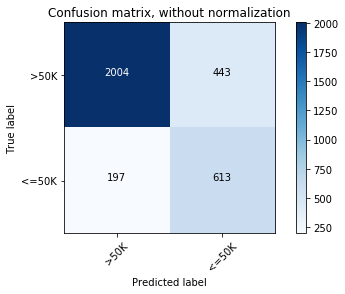

Fold  2
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [3257 3258 3259 ... 6510 6511 6512]
Number of mislabeled points out of a total 3256 points : 645
Accuracy : 0.8019
Confusion matrix, without normalization
[[2003  491]
 [ 154  608]]


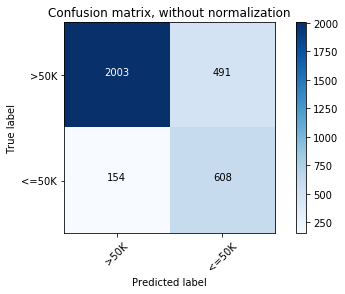

Fold  3
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [6513 6514 6515 ... 9766 9767 9768]
Number of mislabeled points out of a total 3256 points : 626
Accuracy : 0.8077
Confusion matrix, without normalization
[[2045  461]
 [ 165  585]]


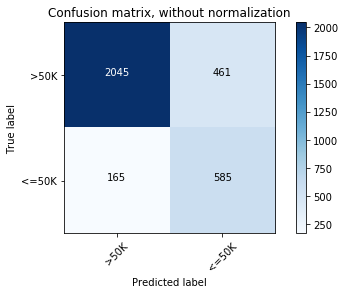

Fold  4
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [ 9769  9770  9771 ... 13022 13023 13024]
Number of mislabeled points out of a total 3256 points : 654
Accuracy : 0.7991
Confusion matrix, without normalization
[[1997  467]
 [ 187  605]]


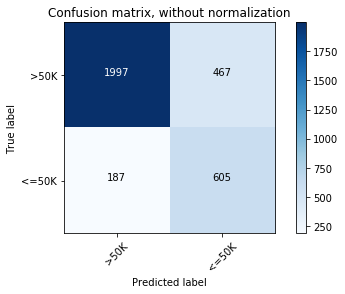

Fold  5
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [13025 13026 13027 ... 16278 16279 16280]
Number of mislabeled points out of a total 3256 points : 652
Accuracy : 0.7998
Confusion matrix, without normalization
[[1996  477]
 [ 175  608]]


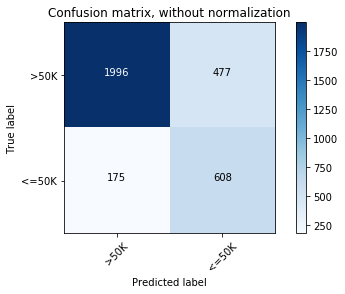

Fold  6
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [16281 16282 16283 ... 19534 19535 19536]
Number of mislabeled points out of a total 3256 points : 665
Accuracy : 0.7958
Confusion matrix, without normalization
[[1991  499]
 [ 166  600]]


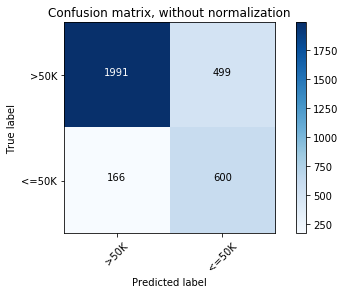

Fold  7
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [19537 19538 19539 ... 22790 22791 22792]
Number of mislabeled points out of a total 3256 points : 629
Accuracy : 0.8068
Confusion matrix, without normalization
[[2041  441]
 [ 188  586]]


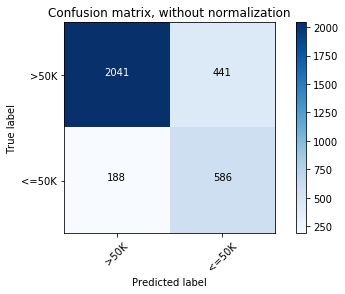

Fold  8
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [22793 22794 22795 ... 26046 26047 26048]
Number of mislabeled points out of a total 3256 points : 594
Accuracy : 0.8176
Confusion matrix, without normalization
[[2018  434]
 [ 160  644]]


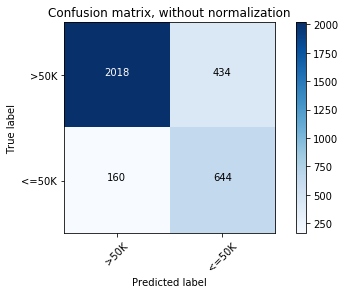

Fold  9
TRAIN : [    0     1     2 ... 32558 32559 32560] 
TEST : [26049 26050 26051 ... 29302 29303 29304]
Number of mislabeled points out of a total 3256 points : 652
Accuracy : 0.7998
Confusion matrix, without normalization
[[1982  478]
 [ 174  622]]


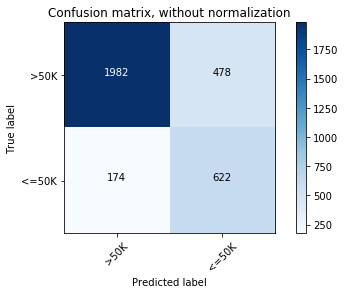

Fold  10
TRAIN : [    0     1     2 ... 29302 29303 29304] 
TEST : [29305 29306 29307 ... 32558 32559 32560]
Number of mislabeled points out of a total 3256 points : 676
Accuracy : 0.7924
Confusion matrix, without normalization
[[1966  486]
 [ 190  614]]


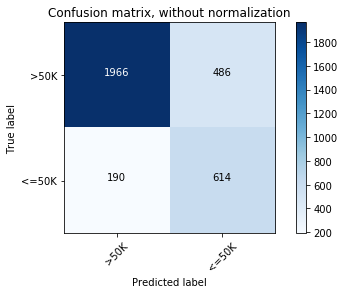

Sum of mislabeled points : 6433
Mean of mislabeled points : 643.3000
Total accuracy : 0.8024


In [8]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
class_names = [">50K", "<=50K"]
print("\n")
print("Decision Tree 10-fold cross validation")
print("=======================")
clf = tree.DecisionTreeClassifier(random_state=222222, class_weight='balanced')
"""
Untuk mendapatkan akurasi yang lebih tinggi, maka akan digunakan parameter class_weight='balanced'
"""
kf = KFold(n_splits = 10, shuffle = False)
print(kf)
i = 1
temp = 0
tempacc = 0
for train_index, test_index in kf.split(data):
    print("Fold ", i)
    print("TRAIN :", train_index, "\nTEST :", test_index)
    x_train = data.iloc[train_index]
    x_test = data.iloc[test_index]
    y_train = target.iloc[train_index]
    y_test = target.iloc[test_index]
    i += 1
    y_pred = clf.fit(x_train, y_train).predict(x_test)
    print("Number of mislabeled points out of a total %d points : %d" % (len(x_test), (y_test != y_pred).sum()))
    print("Accuracy : %.4f" % accuracy_score(y_test,y_pred))
    temp += (y_test != y_pred).sum()
    tempacc += accuracy_score(y_test,y_pred)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')
    plt.show()
tempacc = tempacc/10
print("Sum of mislabeled points : %d" % temp)
print("Mean of mislabeled points : %.4f" % float(temp/10))
print("Total accuracy : %.4f" % tempacc)

# 3. Full Training
Dari nilai akurasi masing-masing 4 algoritma pembelajaran yang sudah dilakukan, 
didapatkan nilai akurasi tertinggi yaitu algoritma decision tree dengan akurasi 0.8143.
Sehingga akan dilakukan full training menggunakan algoritma decision tree.

In [9]:
knn = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree')
y_pred = knn.fit(data, target).predict(data)

print("Number of mislabeled points out of a total %d points : %d" % (data.shape[0], (target != y_pred).sum()))
print("Accuracy : %.4f" % accuracy_score(target,y_pred))

Number of mislabeled points out of a total 32561 points : 4467
Accuracy : 0.8628


# 4. Load Model

In [10]:
# from sklearn.externals import joblib
# filename = 'clf.sav'
# joblib.dump(knn, filename)

import pickle
pickle.dump(knn, open( "dumpfile.p", "wb"))

In [11]:
#  hasil = joblib.load(filename)
clf_result = pickle.load(open( "dumpfile.p", "rb" ))

In [12]:
test = pd.read_csv("CencusIncome.test.txt", names=attributeName)
# GANTI PATHNYA ^^^^^^^^^^^^^^^^^^^^^

test["capital-gain"] = test[["capital-gain"]].replace('?', test["capital-gain"].mean())
test["capital-loss"] = test[["capital-loss"]].replace('?', test["capital-loss"].mean())
test["hours-per-week"] = test[["hours-per-week"]].replace('?', test["hours-per-week"].mean())

test["workclass"] = test[["workclass"]].replace(' ?', " " + test["workclass"].mode()[0])
test["education"] = test[["education"]].replace(' ?', " " + test["education"].mode()[0])
test["marital-status"] = test[["marital-status"]].replace(' ?', " " + test["marital-status"].mode()[0])
test["occupation"] = test[["occupation"]].replace(' ?', " " + test["occupation"].mode()[0])
test["relationship"] = test[["relationship"]].replace(' ?', " " + test["relationship"].mode()[0])
test["race"] = test[["race"]].replace(' ?', " " + test["race"].mode()[0])
test["sex"] = test[["sex"]].replace(' ?', " " + test["sex"].mode()[0])
test["salary"] = np.where(test.salary == ' <=50K.', 0, 1)

#DATA ENCODING
cidata = test.values

cidata[:,1] = le1.transform(cidata[:,1])

cidata[:,3] = le3.transform(cidata[:,3])

cidata[:,5] = le5.transform(cidata[:,5])

cidata[:,6] = le6.transform(cidata[:,6])

cidata[:,7] = le7.transform(cidata[:,7])

cidata[:,8] = le8.transform(cidata[:,8])

cidata[:,9] = le9.transform(cidata[:,9])

cidata[:,13] = le13.transform(cidata[:,13])

print(cidata)

[[25 4 226802 ... 40 39 0]
 [38 4 89814 ... 50 39 0]
 [28 2 336951 ... 40 39 1]
 ...
 [38 4 374983 ... 50 39 0]
 [44 4 83891 ... 40 39 0]
 [35 5 182148 ... 60 39 1]]


In [13]:
index = [str(i) for i in range(0, len(cidata))]
test2 = pd.DataFrame(data=np.int_(cidata[:,:]), columns=attributeName, index=index)

test_target = test2.loc[:,"salary"]
test_data = test2.loc[:,"age":"native-country"]
test_data = test_data.drop('education-num', axis=1)
test_data = test_data.drop('fnlwgt', axis=1)
test_data = test_data.drop('native-country', axis=1)
test_data = test_data.drop('age', axis=1)

In [14]:
test_pred = knn.predict(test_data)
print(test_pred)

print("Number of mislabeled points out of a total %d points : %d" % (test_data.shape[0], (test_target != test_pred).sum()))
print("Accuracy : %.4f" % accuracy_score(test_target,test_pred))

[0 0 1 ... 1 0 1]
Number of mislabeled points out of a total 16281 points : 2374
Accuracy : 0.8542


In [15]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO